In [114]:
import json
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import pandas as pd

In [115]:
with open('y_pred_list_test.json', 'r') as preds_file:
    predictions_test = json.load(preds_file)

with open('y_true_list_test.json','r') as labels_file:
    targets_test = json.load(labels_file)

with open('y_pred_list_train.json', 'r') as preds_file:
    predictions_train = json.load(preds_file)

with open('y_true_list_train.json', 'r') as labels_file:
    targets_train = json.load(labels_file)


# print(predictions[0][0:5])

In [116]:
def convert_to_minority_class():
    new_predictions = []
    new_targets = []

    for i, episode in enumerate(targets):
        new_episode_pred = []
        new_episode_targ = []
        for j, label in enumerate(episode):
            if label == 1:
                new_episode_pred.append(predictions[i][j])
                new_episode_targ.append(label)
        new_predictions.append(new_episode_pred)
        new_targets.append(new_episode_targ)
        print(new_predictions[i][:5])

    predictions = new_predictions
    targets = new_targets

In [117]:
def get_roc_pred_targs(preds, targs):
    new_targets = []
    new_predictions = []
    for target in targs:
        new_targets.extend(target)

    new_targets = [int(x) for x in new_targets]

    print(type(new_targets))

    for prediction in preds:
        new_predictions.extend(prediction)

    print(type(new_predictions))
    return new_predictions, new_targets

def get_roc(preds, targs):
    print(type(preds), type(targs))
    fpr, tpr, _ = roc_curve(targs, preds)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc


In [118]:
# Plot the roc curve
def plot_curve_roc(tpr, fpr, roc_auc):
    plt.figure()
    lw = 2

    plt.plot(
        fpr,
        tpr,
        color="lightgreen",
        lw=lw,
        label="ROC Curve (area = %0.2f)" % roc_auc
    )

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Test Set Perp/Not Perp Data")
    plt.legend(loc="lower right")
    plt.show()

<class 'list'>
<class 'list'>
<class 'list'> <class 'list'>


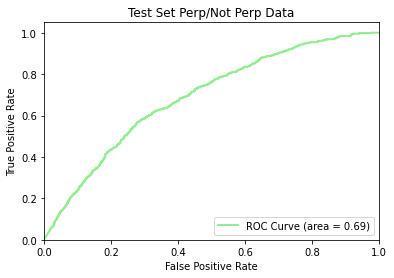

In [119]:
# For the test set:
preds, targs = get_roc_pred_targs(predictions_test, targets_test)
fpr, tpr, roc_auc = get_roc(preds, targs)
plot_curve_roc(tpr, fpr, roc_auc)

<class 'list'>
<class 'list'>
<class 'list'> <class 'list'>


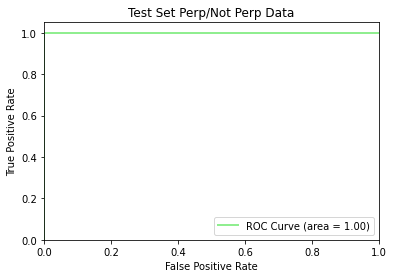

In [120]:
# For the train set:
preds, targs = get_roc_pred_targs(predictions_train, targets_train)
fpr, tpr, roc_auc = get_roc(preds, targs)
plot_curve_roc(tpr, fpr, roc_auc)

In [121]:
def convert_to_binary(predictions):
    for prediction in predictions:
        for i, value in enumerate(prediction):
            if value > 0.5:
                prediction[i] = 1.0
            else:
                prediction[i] = 0.0
    return predictions

In [122]:
def get_results(predictions, targets):
    results = []

    for prediction, target in zip(predictions,targets):
        print("Pred: ", prediction[:10])
        print("Targ: ", target[:10])
        results.append(metrics.classification_report(target, prediction, output_dict=True))

    return results

In [123]:
def get_results_df(results):
    precision_values = 0
    recall_values = 0
    f1_values = 0
    num_vals = len(results)

    for result in results:
        weighted_avg = result['weighted avg']
        precision_values += weighted_avg['precision']
        recall_values += weighted_avg['recall']
        f1_values += weighted_avg['f1-score']

    precision = precision_values / num_vals
    recall = recall_values / num_vals
    f1 = f1_values / num_vals

    results_dict = {
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }

    results_df = pd.DataFrame.from_dict(results_dict, orient='index')

    return results_df

In [124]:
# Metrics score for test
predictions_test = convert_to_binary(predictions_test)
results_test = get_results(predictions_test, targets_test)
results_df_test = get_results_df(results_test)

Pred:  [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [125]:
# Metrics for train
predictions_train = convert_to_binary(predictions_train)
results_train = get_results(predictions_train, targets_train)
results_df_train = get_results_df(results_train)

Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Targ:  [0.0, 0

In [126]:
print("Results Train:\n", results_df_train)
print("Results Test:\n", results_df_test)

Results Train:
              0
precision  1.0
recall     1.0
f1-score   1.0
Results Test:
                   0
precision  0.809062
recall     0.815112
f1-score   0.811292
